In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("e11.csv")

In [7]:
import pandas as pd
import numpy as np

# Define the column names you want to work with
column_names = ['c51', 'c52', 'c53', 'c54','c161']

# Create an empty DataFrame to store the results
new_df = pd.DataFrame()

# Define the step size (60 data points at a time)
step_size = 60

for column_name in column_names:
    column_data = df[column_name]  # Get the data for the current column
    new_column_data = []  # Create an empty list to store modified data
    
    for i in range(0, len(column_data), step_size):
        # Get the current 50 data points
        data_subset = column_data.iloc[i:i+step_size].copy()
        
        # Calculate the IQR for the current subset
        q1 = np.percentile(data_subset, 25)
        q3 = np.percentile(data_subset, 75)
        iqr = q3 - q1
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = q1 - 1.3 * iqr
        upper_bound = q3 + 1.3 * iqr

        good_subset=data_subset[(data_subset < upper_bound) * (data_subset > lower_bound)]
        
        # Replace outliers with the mean of the 50 data points
        data_subset[data_subset < lower_bound] = good_subset.mean()
        data_subset[data_subset > upper_bound] = good_subset.mean()
        
        # Append the modified data to the new_column_data list
        new_column_data.extend(data_subset)
    
    # Convert the new_column_data list to a Series and add it to the new DataFrame with the appropriate column name
    new_df[column_name] = pd.Series(new_column_data)

# Now, new_df contains your data with outliers replaced by the mean within each 50-point segment


In [13]:
# Define the column names you want to work with
column_names = ['c51', 'c52', 'c53', 'c54']

# Create an empty DataFrame to store the results
new_df = pd.DataFrame()

# Define the step size (50 data points at a time)
step_size = 60

for column_name in column_names:
    column_data = df[column_name]  # Get the data for the current column
    new_column_data = []  # Create an empty list to store modified data
    
    for i in range(0, len(column_data), step_size):
        # Get the current 50 data points
        data_subset = column_data.iloc[i:i+step_size].copy()
        
        # Calculate the IQR for the current subset
        q1 = np.percentile(data_subset, 25)
        q3 = np.percentile(data_subset, 75)
        iqr = q3 - q1
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = q1 - 1.3 * iqr
        upper_bound = q3 + 1.3 * iqr

        for j in range(step_size):
            if(i+j>30 and i+j<len(column_data)):
                 if(data_subset[i+j]<lower_bound or data_subset[i+j]>upper_bound):
                     data_subset[i+j]=column_data[i+j-30:i+j].mean()
       
        
        # Append the modified data to the new_column_data list
        new_column_data.extend(data_subset)
    
    # Convert the new_column_data list to a Series and add it to the new DataFrame with the appropriate column name
    new_df[column_name] = pd.Series(new_column_data)

# Now, new_df contains your data with outliers replaced by the mean within each 50-point segment


In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

selected_columns = ['c51', 'c52', 'c53', 'c54']

# Create a subplot with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2)

for i, (column) in enumerate((selected_columns), start=1):
    # Calculate the row and column indices for the subplot
    row_index = (i - 1) // 2 + 1
    col_index = (i - 1) % 2 + 1

    # Add a scatter trace for the data from df
    fig.add_trace(go.Scatter(x=df.index, y=df[column], mode='lines', name=f'Data from df[{column}]', line=dict(color='blue')), row=row_index, col=col_index)
    
    # Add a scatter trace for the data from new_df
    fig.add_trace(go.Scatter(x=new_df.index, y=new_df[column], mode='lines', name=f'Data from new_df[{column}]', line=dict(color='red', dash='dash')), row=row_index, col=col_index)
    
    # Set subplot title and axis labels
    fig.update_xaxes(title_text='Date', row=row_index, col=col_index)
    fig.update_yaxes(title_text=column, row=row_index, col=col_index)
    fig.update_layout(title_text=f'Line Plot of {column}', showlegend=True)

# Adjust subplot layout
fig.update_layout(height=1500, width=1500, title_text="Subplots with Multiple Graphs")
fig.update_layout(showlegend=True)
fig.show()


In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

selected_columns = ['c51', 'c52', 'c53', 'c54']

# Create a subplot with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2)

for i, (column) in enumerate((selected_columns), start=1):
    # Calculate the row and column indices for the subplot
    row_index = (i - 1) // 2 + 1
    col_index = (i - 1) % 2 + 1

    # Add a scatter trace for the data from df
    fig.add_trace(go.Scatter(x=df.index, y=df[column], mode='lines', name=f'Data from df[{column}]', line=dict(color='blue')), row=row_index, col=col_index)
    
    # Add a scatter trace for the data from new_df
    fig.add_trace(go.Scatter(x=new_df.index, y=new_df[column], mode='lines', name=f'Data from new_df[{column}]', line=dict(color='red', dash='dash')), row=row_index, col=col_index)
    
    # Set subplot title and axis labels
    fig.update_xaxes(title_text='Date', row=row_index, col=col_index)
    fig.update_yaxes(title_text=column, row=row_index, col=col_index)
    fig.update_layout(title_text=f'Line Plot of {column}', showlegend=True)

# Adjust subplot layout
fig.update_layout(height=1500, width=1500, title_text="Subplots with Multiple Graphs")
fig.update_layout(showlegend=True)
fig.show()


In [70]:

# for i, column in enumerate(selected_columns, start=1):
#     plt.subplot(2, 2, i)  # 2x2 grid for 4 subplots
#     plt.plot(df['c1'], df[column])
#     plt.xlabel('Date')
#     plt.ylabel(column)
#     plt.title(f'Line Plot of {column}')
# plt.tight_layout()  # Adjust spacing between subplots for better layout

horizontal_line_values_1 = [ub_c51, ub_c52, ub_c53, ub_c54]
horizontal_line_values_2 = [lb_c51, lb_c52, lb_c53, lb_c54]

for i, (column, value_1,value_2) in enumerate(zip(selected_columns, horizontal_line_values_1, horizontal_line_values_2), start=1):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, i)  # 2x2 grid for 4 subplots
    plt.plot(df['c1'], df[column],color='b')
    plt.plot(df['c1'],new_df[column],color='r')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Line Plot of {column}')
    plt.axhline(value_1, color='red', linestyle='--', label=f'Horizontal Line at {value_1}')
    plt.axhline(value_2, color='red', linestyle='--', label=f'Horizontal Line at {value_2}')

plt.tight_layout()  # Adjust spacing between subplots for better layout
plt.show()

NameError: name 'ub_c51' is not defined

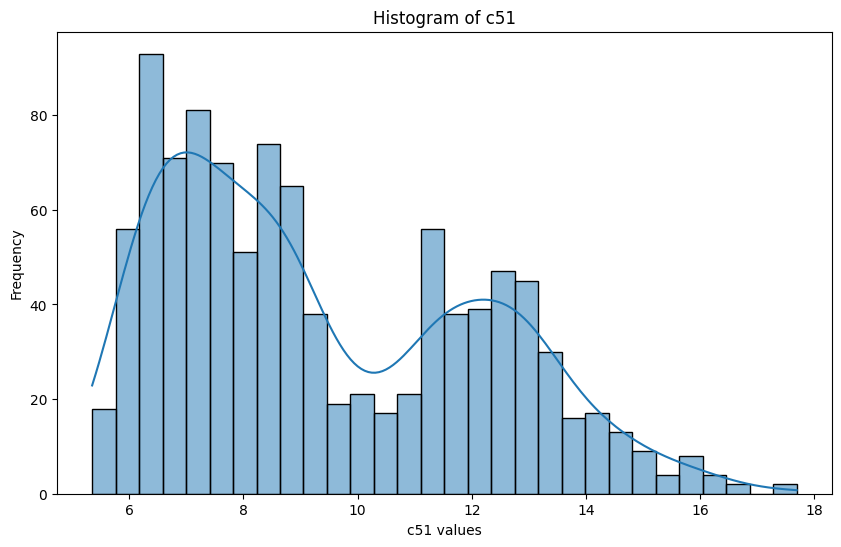

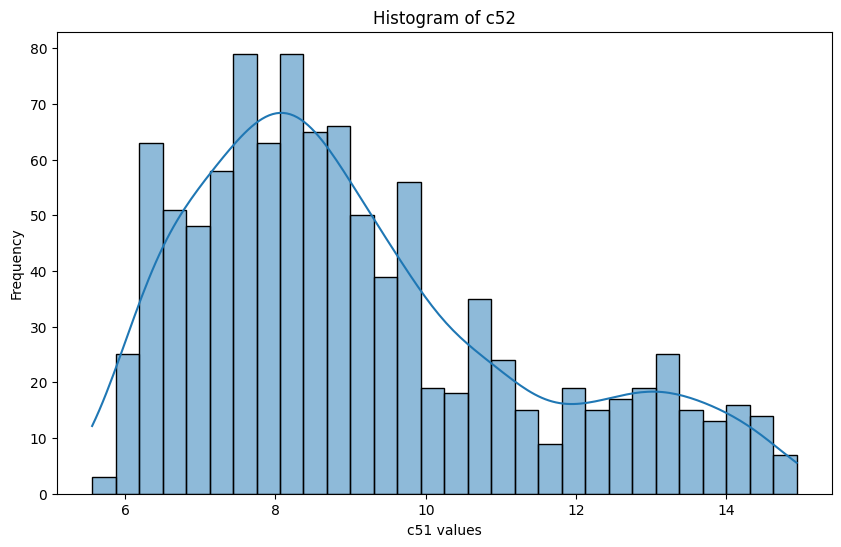

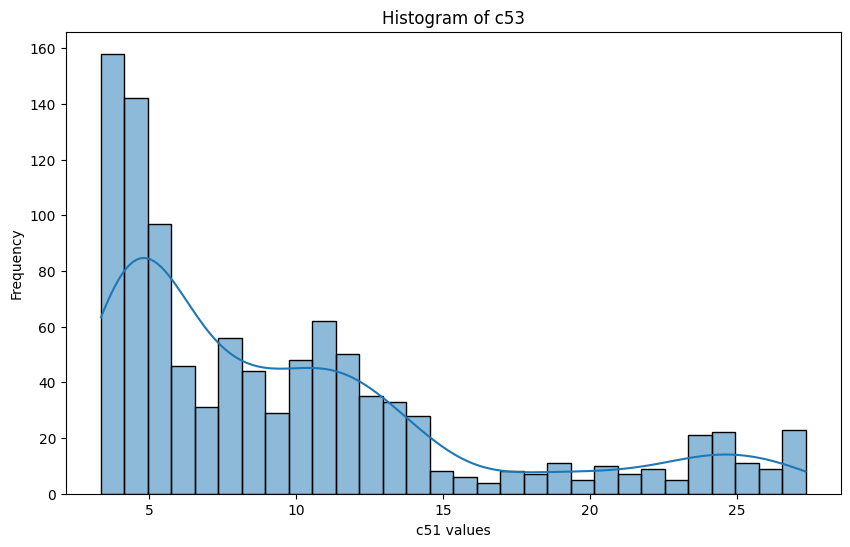

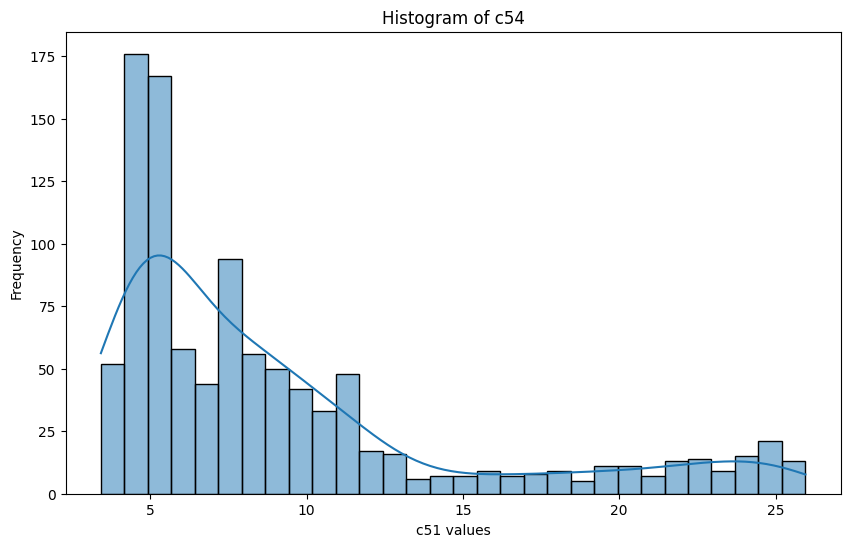

In [ ]:
for i, column in enumerate(selected_columns, start=1):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('c51 values')
    plt.ylabel('Frequency')
    plt.show()

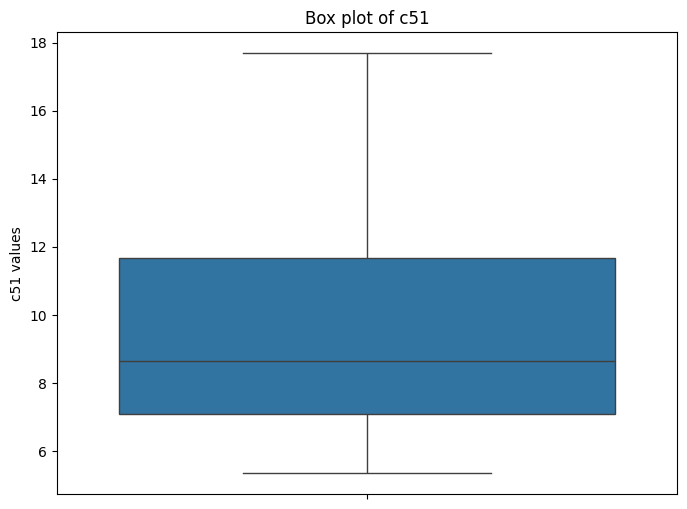

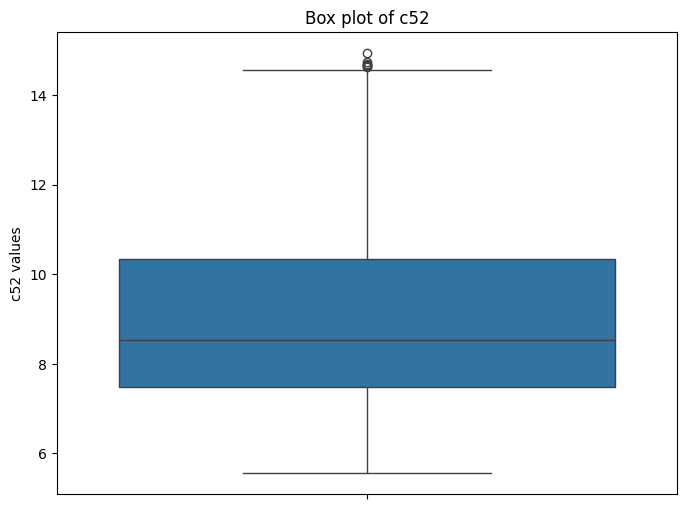

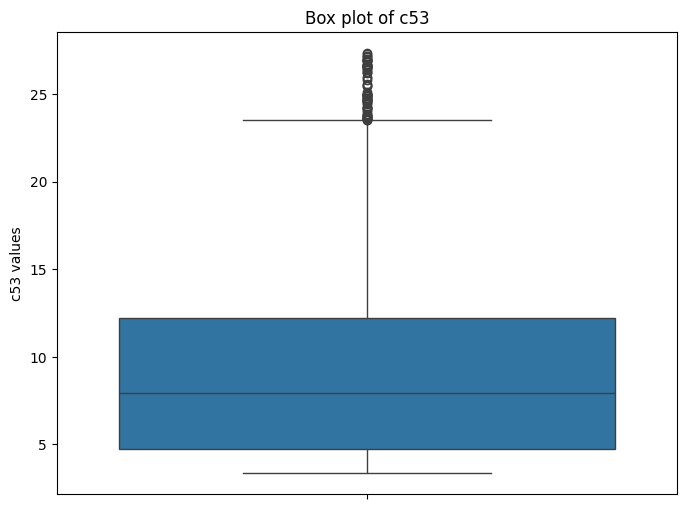

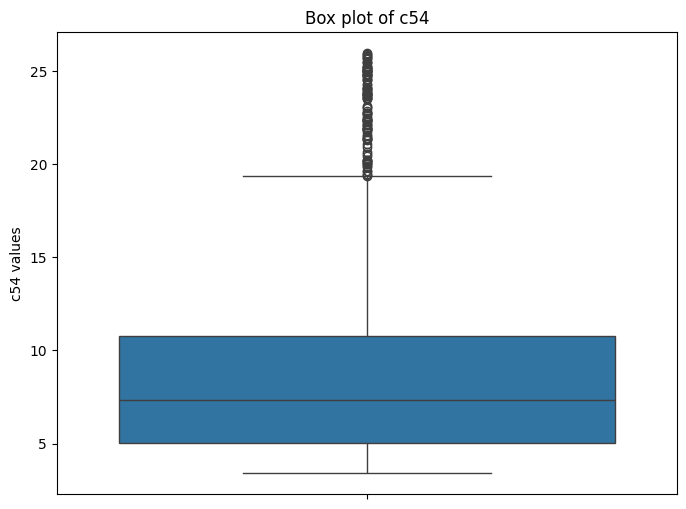

In [ ]:
for i, column in enumerate(selected_columns, start=1):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column], data=df)
    plt.title(f'Box plot of {column}')
    plt.ylabel(f'{column} values')
    plt.show()

In [ ]:
print(df.isnull().sum())

c1      0
c2      0
c3      0
c4      0
c5      0
       ..
c236    0
c237    0
c238    0
c239    0
c241    0
Length: 240, dtype: int64


In [ ]:
# Handle missing values (example: drop columns with more than 30% missing data)
df_clean = df.dropna(thresh=len(df) * 0.7, axis=1)
print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Columns: 214 entries, c1 to c241
dtypes: float64(187), int64(6), object(21)
memory usage: 1.7+ MB
None
           c2           c3           c4           c5           c6  \
count  1025.0  1025.000000  1025.000000  1025.000000  1025.000000   
mean      2.0   171.061049   168.322977     0.563291     1.509533   
std       0.0     8.329791     4.963322     0.185887     0.673348   
min       2.0   140.654193   128.004425     0.000000     0.037662   
25%       2.0   166.407062   166.863934     0.410097     0.991921   
50%       2.0   172.887592   169.176483     0.609396     1.467761   
75%       2.0   176.347090   170.942968     0.710838     2.013017   
max       2.0   189.867702   177.218128     0.887362     2.834391   

                c7           c8           c9          c10          c11  ...  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  ...   
mean      2.349020    20.188791     8.05860

In [ ]:
num_columns = df_clean.shape[1]
print("Number of columns in df_clean:", num_columns)

Number of columns in df_clean: 214


In [ ]:
# List columns before and after dropping
original_columns = df.columns
cleaned_columns = df_clean.columns

# Get the names of dropped columns
dropped_columns = list(set(original_columns) - set(cleaned_columns))

# Print the names of dropped columns
print("Dropped Columns:", dropped_columns)

Dropped Columns: ['c215', 'c202', 'c207', 'c211', 'c212', 'c218', 'c221', 'c209', 'c199', 'c222', 'c219', 'c216', 'c208', 'c233', 'c210', 'c223', 'c204', 'c232', 'c229', 'c231', 'c213', 'c214', 'c220', 'c234', 'c226', 'c217']


In [ ]:
# Identify numeric columns (excluding 'c1' timestamp column)
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

# Calculate Q1, Q3, and IQR only for numeric columns
Q1 = df_clean[numeric_columns].quantile(0.25)
Q3 = df_clean[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Apply outlier detection only to numeric columns
df_clean_no_outliers = df_clean[~((df_clean[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_clean[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
print(df_clean_no_outliers.info())
print(df_clean_no_outliers.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 162 to 614
Columns: 214 entries, c1 to c241
dtypes: float64(187), int64(6), object(21)
memory usage: 162.9+ KB
None
         c2          c3          c4         c5         c6         c7  \
count  97.0   97.000000   97.000000  97.000000  97.000000  97.000000   
mean    2.0  173.961706  168.099384   0.548163   1.464156   2.462849   
std     0.0    2.525741    1.903870   0.193944   0.709603   0.168719   
min     2.0  167.747305  163.335798   0.017129   0.111992   2.230391   
25%     2.0  172.174342  166.787443   0.390505   0.953972   2.346560   
50%     2.0  173.173886  167.766833   0.587267   1.545812   2.418890   
75%     2.0  175.964672  169.726500   0.711339   1.883679   2.575586   
max     2.0  178.897400  172.441119   0.831030   2.834391   2.799840   

              c8         c9        c10        c11  ...       c224       c225  \
count  97.000000  97.000000  97.000000  97.000000  ...  97.000000  97.000000   
mean   20.540825  

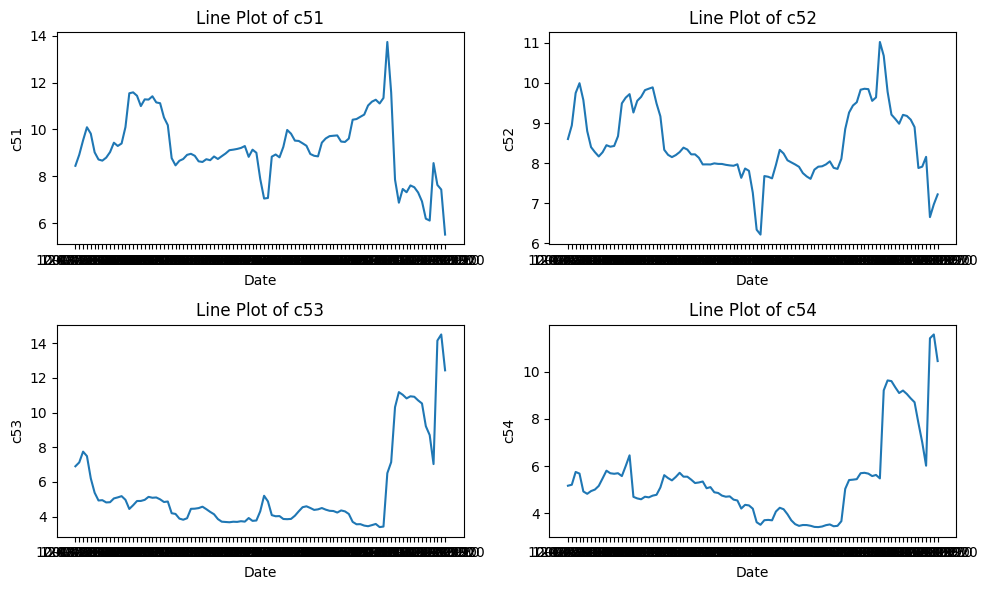

In [ ]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(selected_columns, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 subplots
    plt.plot(df_clean_no_outliers['c1'], df_clean_no_outliers[column])
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Line Plot of {column}')
plt.tight_layout()  # Adjust spacing between subplots for better layout
plt.show()

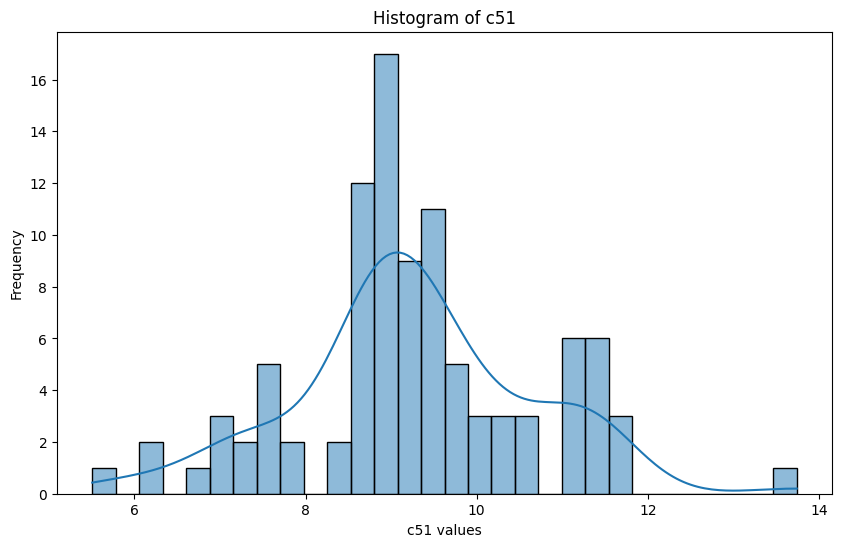

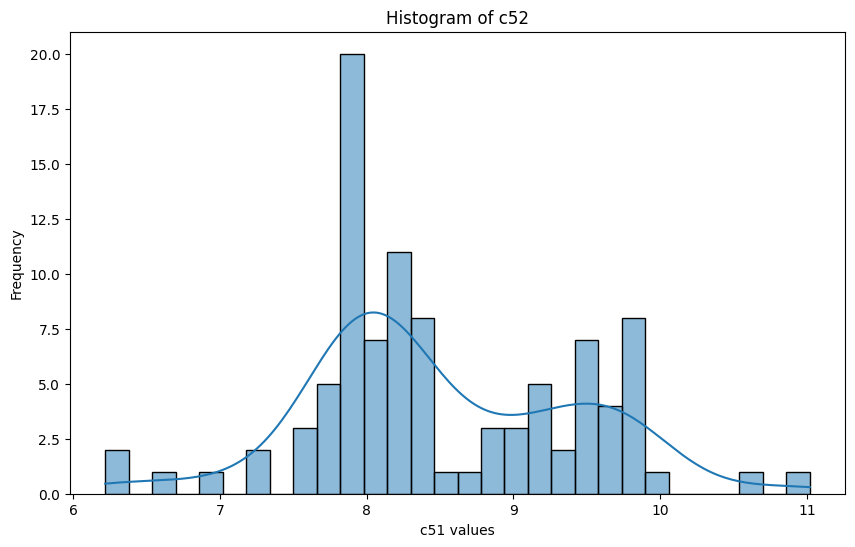

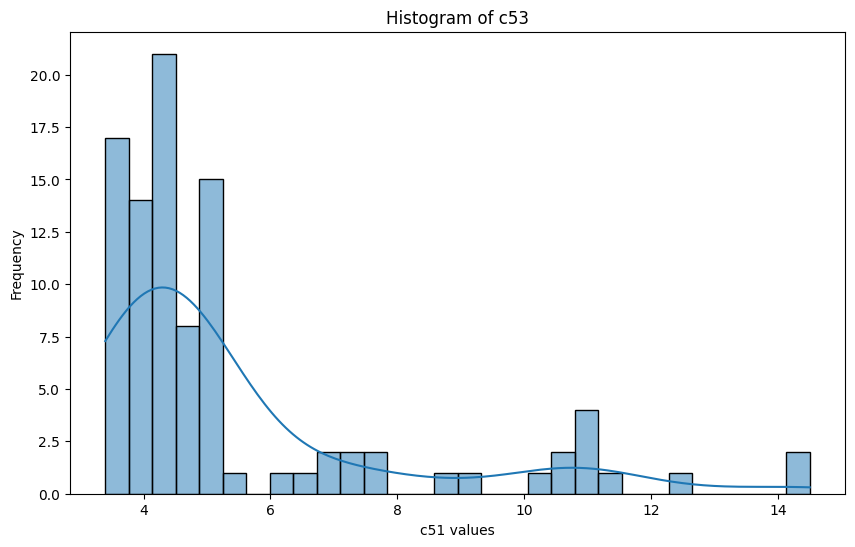

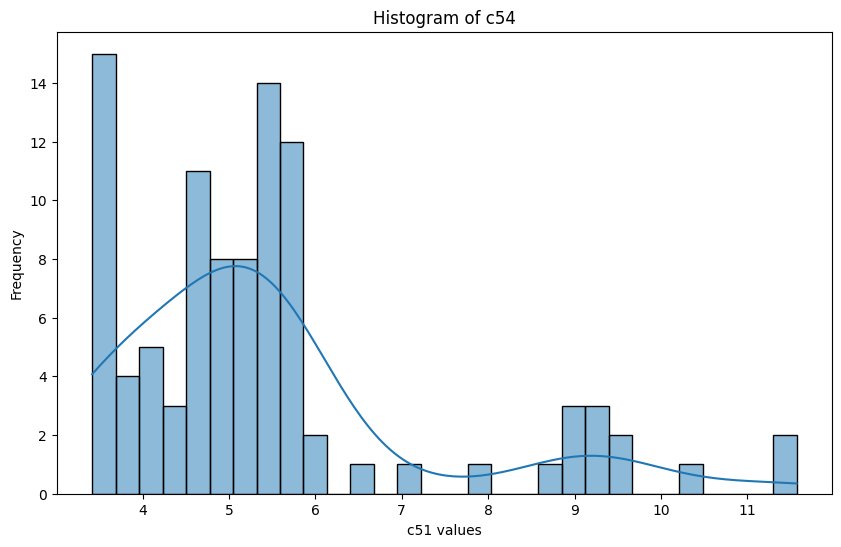

In [ ]:
for i, column in enumerate(selected_columns, start=1):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_clean_no_outliers[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('c51 values')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
q1 = np.percentile(new_df['c161'], 25)
q3 = np.percentile(new_df['c161'], 75)
iqr = q3 - q1
        
        # Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.2 * iqr
upper_bound = q3 + 1.2 * iqr
        
        # Replace outliers with the mean of the 50 data points
new_df[new_df < lower_bound] = new_df.mean()
new_df[new_df > upper_bound] = new_df.mean()


ValueError: Must specify axis=0 or 1